# 탐구실험용 toy 코드  (Facebook 바비 Question-Answer)

<p> &nbsp;
    
# +++++++++++++++++++++++++++++++++++++++++++++



#  toy 코드의 한계 및 약점은 ? 약점을 보강할 수 있는 방법 ?

<p>

# 영어와 한글 데이터의 부족을 한영 번역기로 try 하며 탐구
    
<p> &nbsp;
    
## +++++++++++++++++++++++++++++++++++++++++++++++++++

<p> &nbsp;
    
## toy 코드를 통해 약점을 알아내고, 데이터를 조작하며 (좋은 뜻으로 조절),

## 데이터가 어떻게 변형되고, 행렬의 weight와 정확도가 어떻게 변화하는지?

## input 과 중간의 형태, 그리고 최종 output 의 흐름을 스토리텔링하며 탐구 !

# =========== 탐구과제용 :기본적인 문제 =========

# 어떻게 AI 와 수학교육이 융합하여 발전할 수 있을까?

# 영어 데이터를 한글 학습데이터를 번역하고 보강한다.

# 한국어 질문-응답 수학학습 시스템을 만들 수 있을까?

# 무엇보다도, 데이터를 처리하는 방법을 먼저 익히고

# 데이터로 딥러닝하는 알고리즘과 attention 을 탐구하자.

# ==========================================

# Babi 문제 (인터넷에서 babi 문제와 데이터를 찾아본다)

# 교재 130 페이지 참고

## 바비 데이터 github  : https://github.com/andri27-ts/bAbI

<p>


# 수학교육 탐구과제로 도전가능한 문제    
    
# QA6 - Yes/No Questions	

# QA7 - Counting	


### 바비 데이터 : https://github.com/harvardnlp/MemN2N/tree/master/babi_data/en


<p> &nbsp;
    
    
# settings ==> .keras ==> dataset 안에 데이터 저장됨 


https://appliedmachinelearning.blog/2019/05/01/developing-factoid-question-answering-system-on-babi-facebook-data-set-python-keras-part-1/




#  Feature Extraction

Let us first write a helper function to vectorize each stories in order to fetch it to memory network model which we will be creating later.

https://appliedmachinelearning.blog/2019/05/02/building-end-to-end-memory-network-for-question-answering-system-on-babi-facebook-data-set-python-keras-part-2/

# ===================================


# 바비 데이터로 뉴럴네트워크 모델 학습시키기 


<p> &nbsp;


# === 자연어처리 :  babi  QAchatbot  만들기 ===


<p> &nbsp;

# 본래의 Babi QA6 데이터는 data_in 에있다

## ./data_in/babi_qa6_train.txt

## ./data_in/babi_qa6_test.txt


<p> &nbsp;
    
# =================================
    
<p> &nbsp;

# toy code 에서는 다음 데이터를 사용한다.

## ./data_in/babi_train_qa.txt

## ./data_in/babi_test_qa.txt
    
## toy code 의 데이터와 본래 데이터의 차이점은 ??
    
## +++++++++++++++++++++++++++++++++

<p> &nbsp;

# ========= Toy 바비 QA 탐구===========

In [1]:
#Library Imports

import pickle

import numpy as np
import pandas as pd

# pickle 데이터 파일과 csv 데이터 파일

## 교재 80페이지의 pandas, numpy 를 익힌다. 

In [3]:
#retrieve training data

# IOPub data rate exceeded. 
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

unpickled_df = pd.read_pickle('./data_in/babi_train_qa.txt')
# print( unpickled_df)== list 이다 
   
df = pd.DataFrame( unpickled_df )  
# df = pd.DataFrame(some_list, columns=["colummn"]) 

df.to_csv('./data_in/babi_train_qa.csv', index=False)

print( df[0:5] ) 

df.shape # 학습 데이터의 갯수 일만개 :

                                                   0  \
0  [Mary, moved, to, the, bathroom, ., Sandra, jo...   
1  [Mary, moved, to, the, bathroom, ., Sandra, jo...   
2  [Mary, moved, to, the, bathroom, ., Sandra, jo...   
3  [Mary, moved, to, the, bathroom, ., Sandra, jo...   
4  [Mary, moved, to, the, bathroom, ., Sandra, jo...   

                                    1    2  
0   [Is, Sandra, in, the, hallway, ?]   no  
1  [Is, Daniel, in, the, bathroom, ?]   no  
2    [Is, Daniel, in, the, office, ?]   no  
3   [Is, Daniel, in, the, bedroom, ?]  yes  
4   [Is, Daniel, in, the, bedroom, ?]  yes  


(10000, 3)

In [5]:
#retrieve training data

# IOPub data rate exceeded.
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000

unpickled_df = pd.read_pickle('./data_in/babi_test_qa.txt')
# print( unpickled_df)== list 이다 
   
df = pd.DataFrame( unpickled_df )  
# df = pd.DataFrame(some_list, columns=["colummn"]) 

df.to_csv('./data_in/babi_test_qa.csv', index=False)

print( df[0][0] )
print( df[1][0] )
print( df[2][0] )

print( df[0][4] )
print( df[1][4] )
print( df[2][4] )

print( df[0][5] )
print( df[1][5] )
print( df[2][5] )

print( df.shape )  # ===> 테스트 데이터의 갯수 1000 개

['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.']
['Is', 'John', 'in', 'the', 'kitchen', '?']
no
['Mary', 'got', 'the', 'milk', 'there', '.', 'John', 'moved', 'to', 'the', 'bedroom', '.', 'Mary', 'discarded', 'the', 'milk', '.', 'John', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'moved', 'to', 'the', 'bedroom', '.', 'Daniel', 'went', 'to', 'the', 'garden', '.', 'Daniel', 'travelled', 'to', 'the', 'bathroom', '.', 'Sandra', 'travelled', 'to', 'the', 'bedroom', '.', 'Mary', 'took', 'the', 'football', 'there', '.', 'Sandra', 'grabbed', 'the', 'milk', 'there', '.']
['Is', 'Daniel', 'in', 'the', 'bedroom', '?']
no
['Daniel', 'went', 'back', 'to', 'the', 'kitchen', '.', 'Mary', 'grabbed', 'the', 'apple', 'there', '.']
['Is', 'Daniel', 'in', 'the', 'office', '?']
no
(1000, 3)



# [문제] 아래 QA6 text 파일과 비교하여보라

## ./data_in/babi_qa6_train.txt

## ./data_in/babi_qa6_test.txt

In [6]:
with open('./data_in/babi_train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

print( train_data[10] )
train_data[0][0:3]

(['Sandra', 'went', 'back', 'to', 'the', 'hallway', '.', 'Sandra', 'moved', 'to', 'the', 'office', '.'], ['Is', 'Sandra', 'in', 'the', 'office', '?'], 'yes')


(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [7]:
#retrieve test data

with open('./data_in/babi_test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [8]:
#Number of training instances
len(train_data)

10000

In [9]:
#Number of test instances

len(test_data)

1000

In [10]:
#Example of one of the instances

train_data[10]

(['Sandra',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'moved',
  'to',
  'the',
  'office',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 'yes')

In [11]:
' '.join(train_data[10][0])

'Sandra went back to the hallway . Sandra moved to the office .'

In [12]:
' '.join(train_data[10][1])

'Is Sandra in the office ?'

In [16]:
train_data[10][2]

'yes'

# ++++++++++++++++++++++++++++++++++++

<p> &nbsp;
    
# [과제] 한글 챗복 데이터 다루기    
    
    
<p> &nbsp;
    
# ++++++++++++++++++++++++++++++++++++

<p>

# [과제 1] data_nmt/conversaiton2.txt  데이터 다루기

In [37]:
import pandas as pd

file = open( "./data_nmt/conversation2.txt", "r" , encoding="utf-8")
data = file.readlines()
df1 = []
for ii in data:
    df1.append(ii[:-1])


df2 = pd.DataFrame( df1  )
 
df2.to_csv( './data_nmt/conversation2.csv' , index=False, encoding='utf-8')


datacsv = pd.read_csv( './data_nmt/conversation2.csv' ,  encoding='utf-8')

datacsv

,0
0,어떻게 지내세요?
1,잘 지내고 있어요. 당신은요?
2,저도 잘 지내고 있어요.
3,"네, 그럼 안녕히 가세요."
4,계속 연락해요.
...,...
495,그러게요. 거긴 어때요?
496,매우 포근한 날씨네요.
497,나들이 가기 좋은 날씨죠.
498,안녕하세요


In [38]:
print( datacsv[0:5] )

result_data=list( )

input_data = list( datacsv['0'][0:5] )
######################################

for seq in input_data :
    print( seq )
    result = " ".join( okt.morphs(seq.replace(' ', '')))
    result_data.append( result )
    
print( result_data )

datas = []

datas.extend( result_data )
             
datas

                  0
0         어떻게 지내세요?
1  잘 지내고 있어요. 당신은요?
2     저도 잘 지내고 있어요.
3    네, 그럼 안녕히 가세요.
4          계속 연락해요.
어떻게 지내세요?
잘 지내고 있어요. 당신은요?
저도 잘 지내고 있어요.
네, 그럼 안녕히 가세요.
계속 연락해요.
['어떻게 지내세요 ?', '잘 지내고있어요 . 당 신 은 요 ?', '저 도 잘 지내고있어요 .', '네 , 그럼 안녕히가세요 .', '계속 연락 해 요 .']


['어떻게 지내세요 ?',
 '잘 지내고있어요 . 당 신 은 요 ?',
 '저 도 잘 지내고있어요 .',
 '네 , 그럼 안녕히가세요 .',
 '계속 연락 해 요 .']

In [39]:

import re

FILTERS = "([~.,!?\"':;)(])"
CHANGE_FILTER = re.compile(FILTERS)

vocabwords = []
for sentence in datas:
    # FILTERS = "([~.,!?\"':;)(])"
    # 위 필터와 같은 값들을 정규화 표현식을 
    # 통해서 모두 "" 으로 변환 해주는 부분이다.
    sentence = re.sub(CHANGE_FILTER, "", sentence)
    for word in sentence.split():
        vocabwords.append(word)
            
print( vocabwords )

['어떻게', '지내세요', '잘', '지내고있어요', '당', '신', '은', '요', '저', '도', '잘', '지내고있어요', '네', '그럼', '안녕히가세요', '계속', '연락', '해', '요']


In [40]:
import re


DATA_PATH="./data_nmt/conversation2.txt" 
############## 챗봇 데이터 ############




def Tokenizer( sentence ):
    token=[]
    for word in sentence.strip().split():
        token.extend(re.compile("([.,!?\"':;)(])").split(word))
        
    ret=[t for t in token if t]
    return ret             

    
    
wordsk=[]
datask=[]



with open( DATA_PATH , 'r' , encoding='utf-8' ) as f:
    lines=f.read()
    datask.append(lines)
    wordsk=Tokenizer( lines  )
    wordsk=list( set( wordsk ) )

    
# list <=== datas.shape 


print( wordsk[0:10] )

datask[0][0:100] 

['스트레스', '캐나다의', '다음에', '볼링이나', '미용실은', '지갑', '4분전에요', '바쿠', '언제', '이메일로']


'어떻게 지내세요?\n잘 지내고 있어요. 당신은요?\n저도 잘 지내고 있어요.\n네, 그럼 안녕히 가세요.\n계속 연락해요.\n네, 제가 곧 다시 연락 드릴게요.\n이메일로 연락주세요.\n지금 '

In [41]:
from konlpy.tag import Okt

okt = Okt()


wordsz=[]
datasz=[]

with open(  DATA_PATH , 'r', encoding='utf-8') as  content_file :
    for con in content_file: 
        content = content_file.read()
        datasz.append( content )
        wordsz.extend( okt.morphs(content)   )
        wordsz = list(set(wordsz))

            
print( wordsz[0:10] )

datasz[0][0:100] 

['칠까', '스트레스', '전부터', '의', '지갑', '바쿠', '언제', '레스', '야', '모르는']


'잘 지내고 있어요. 당신은요?\n저도 잘 지내고 있어요.\n네, 그럼 안녕히 가세요.\n계속 연락해요.\n네, 제가 곧 다시 연락 드릴게요.\n이메일로 연락주세요.\n지금 어디신가요?\n집이요'

# ++++++++++++++++++++++++++++++++++++

<p>

# [과제 2] data_in/ChatBotData.csv 데이터 다루기

In [34]:
import pandas as pd



data = pd.read_csv( './data_in/ChatBotData.csv' , encoding='utf-8')

print( data.head()  ) 

questions, answers  = list( data['Q'] ) , list( data['A'] )


from konlpy.tag import Okt # Twitter
from tqdm import tqdm
   
morph_analyzer = Okt()  # Twitter()
# 형태소 토크나이즈 결과 문장을 받을
#  리스트를 생성합니다.

result_data = list()
# 데이터에 있는 매 문장에 대해 토크나이즈를
# 할 수 있도록 반복문을 선언합니다.


# Twitter.morphs 함수를 통해 토크나이즈 된
# 리스트 객체를 받고 다시 공백문자를 기준으로
# 하여 문자열로 재구성 해줍니다.
for seq in tqdm( questions + answers ):
    morphlized_seq = " ".join(morph_analyzer.morphs(seq.replace(' ', '')))
    result_data.append(morphlized_seq)
    
    
questions = result_data         
        

  0%|                                                                          | 32/23646 [00:00<01:18, 302.70it/s]

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0


100%|███████████████████████████████████████████████████████████████████████| 23646/23646 [00:58<00:00, 403.43it/s]


In [33]:

import re

FILTERS = "([~.,!?\"':;)(])"
CHANGE_FILTER = re.compile(FILTERS)


vocabwords = []
for sentence in datas:
    # FILTERS = "([~.,!?\"':;)(])"
    # 위 필터와 같은 값들을 정규화 표현식을 
    # 통해서 모두 "" 으로 변환 해주는 부분이다.
    sentence = re.sub(CHANGE_FILTER, "", sentence)
    for word in sentence.split():
        vocabwords.append(word)
            

print( len(vocabwords)  )
            
vocab = set( vocabwords )

print( len(vocab) )

vocfile = './data_out/vocabularyData.txt'

with open(vocfile , 'w' , encoding='utf-8') as wf:
    for w in vocab:
        wf.write(w+"\n")
    print("단어장이 새로 만들어짐 !!")


111808
15680
단어장이 새로 만들어짐 !!


# ++++++++++++++++++++++++++++++++++++

<p>
    

# [문제] 한글 단어장을 만드는 과정을 이해하자 !!

# ++++++++++++++++++++++++++++++++++++

<p> &nbsp;
    
#  챗봇 데이터의 단어장으로 문장을 벡터로 표현 !!
    
    
<p> &nbsp;
    
# ++++++++++++++++++++++++++++++++++++



## 교재 30페이지의 내용과 비교한다



In [15]:
set1=[1,2,3,4,5, 1,2,3,9]
set2=[2,3,5,6,7, 2,3,4,8]

set1 = set(set1)  

moim = set()

moim = moim.union( set1)
moim = moim.intersection( set(set2))
print( moim  )


{2, 3, 4, 5}


#  ./data_in/babi_train_qa.txt  데이터

In [44]:
import pickle


with open('./data_in/babi_train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

print( train_data[10] )
train_data[0][0:3]


#First we will build a set of all the words in the dataset:
vocab = set()
for story, question, answer in train_data:
    vocab = vocab.union(set(story)) #Set returns unique words in the sentence
                                    #Union returns the unique common elements from a two sets
    vocab = vocab.union(set(question))

(['Sandra', 'went', 'back', 'to', 'the', 'hallway', '.', 'Sandra', 'moved', 'to', 'the', 'office', '.'], ['Is', 'Sandra', 'in', 'the', 'office', '?'], 'yes')


In [45]:
vocab.add('no')
vocab.add('yes')

In [46]:
for x in vocab :
    if( x.startswith('b')) :
        print( x )

back
bathroom
bedroom


In [47]:
#Calculate len and add 1 for Keras placeholder - Placeholders are used to feed in the data to the network. 
#They need a data type, and have optional shape arguements.
#They will be empty at first, and then the data will get fed into the placeholder

vocab_len = len(vocab) + 1

In [48]:
vocab_len

38

In [51]:
#retrieve test data

with open('./data_in/babi_test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)
    
#Now we are going to calculate the longest story and the longest question
#We need this for the Keras pad sequences. 

#Keras training layers expect all of the input to have the same length, so 
#we need to pad 

all_data = test_data + train_data

In [52]:
all_story_lens = [len(data[0]) for data in all_data]

In [53]:
max_story_len = (max(all_story_lens))

In [54]:
max_question_len = max([len(data[1]) for data in all_data])

# 이제 Babi 데이터의 문장을 벡터로 만들자

First, we will go through a manual process of how to vectorize the data, and then we will create a function that does this automatically for us. 

In [22]:
import keras

print( keras.__version__ )


from keras.preprocessing.sequence import pad_sequences

from keras.preprocessing.text import Tokenizer


Using TensorFlow backend.


2.3.1


In [23]:
#Create an instance of the tokenizer object:

tokenizer = Tokenizer(filters = [])

tokenizer.fit_on_texts(vocab)

In [24]:
#Dictionary that maps every word in our vocab to an index
# It has been automatically lowercased
#This tokenizer can give different indexes for different words depending on when we run it


tokenizer.word_index

{'took': 1,
 'apple': 2,
 'put': 3,
 'the': 4,
 'office': 5,
 'bathroom': 6,
 'picked': 7,
 'kitchen': 8,
 'football': 9,
 'garden': 10,
 'travelled': 11,
 'went': 12,
 'grabbed': 13,
 'john': 14,
 'discarded': 15,
 'there': 16,
 'down': 17,
 'in': 18,
 'up': 19,
 '.': 20,
 'mary': 21,
 'hallway': 22,
 'journeyed': 23,
 'dropped': 24,
 'to': 25,
 'daniel': 26,
 'got': 27,
 'is': 28,
 'yes': 29,
 'moved': 30,
 'no': 31,
 'bedroom': 32,
 '?': 33,
 'milk': 34,
 'back': 35,
 'sandra': 36,
 'left': 37}

In [25]:
#Tokenize the stories, questions and answers:
train_story_text = []
train_question_text = []
train_answers = []

In [26]:
#Separating each of the elements

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question) 
    train_answers.append(answer)
    

In [27]:
#Coverting the text into the indexes 

train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [28]:
#Create a function for vectorizing the stories, questions and answers:

def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    #vectorized stories:
    X = []
    #vectorized questions:
    Xq = []
    #vectorized answers:
    Y = []
    
    for story, question, answer in data:
        #Getting indexes for each word in the story
        x = [word_index[word.lower()] for word in story]
        #Getting indexes for each word in the story
        xq = [word_index[word.lower()] for word in question]
        #For the answers
        y = np.zeros(len(word_index) + 1) #Index 0 Reserved when padding the sequences
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Now we have to pad these sequences:
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))
        

In [29]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [30]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [31]:
inputs_train[3]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 21, 30, 25,  4,  6, 20, 36, 23, 25,  4, 32, 20, 21, 12, 35,
       25,  4, 32, 20, 26, 12, 35, 25,  4, 22, 20, 36, 12, 25,  4,  8, 20,
       26, 12, 35, 25,  4,  6, 20, 26,  7, 19,  4,  9, 16, 20, 26, 12, 25,
        4, 32, 20])

In [32]:
# train_story_text[3]

train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [37]:
# train_story_seq[3]

train_story_seq[0]

[20, 6, 24, 27, 29, 19, 8, 30, 24, 27, 37, 19]

In [33]:
train_answers[3]

'yes'

In [34]:
answers_train[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0.])

# 교재 36페이지의 input-output mapping 참고


# 벡터 대응시키는 모델 (뉴럴네트워크)

In [35]:
#Imports

from keras.models import Sequential, Model

from keras.layers.embeddings import Embedding

from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [36]:
# We need to create the placeholders 
#The Input function is used to create a keras tensor
#PLACEHOLDER shape = (max_story_len,batch_size)
#These are our placeholder for the inputs, ready to recieve batches of the stories and the questions

input_sequence = Input((max_story_len,)) #As we dont know batch size yet

question = Input((max_question_len,))

In [37]:
print( input_sequence )

print( question )

Tensor("input_1:0", shape=(None, 156), dtype=float32)
Tensor("input_2:0", shape=(None, 6), dtype=float32)


# encocder + decoder 

## 교재 129 페이지 참고

![title](images/babiMNN.png)

On the left part of the previous image we can see a representation of a single layer of this model. Two different embeddings are calculated for each sentence, A and C. Also, the query or question q is embedded, using the B embedding.

The A embeddings mi, are then computed using an inner product with the question embedding u (this is the part where the attention is taking place, as by computing the inner product between these embeddings what we are doing is looking for matches of words from the query and the sentence, to then give more importance to these matches using a Softmax function on the resulting terms of the dot product).

Lastly, we compute the output vector o using the embeddings from C (ci), and the weights or probabilities pi obtained from the dot product. With this output vector o, the weight matrix W, and the embedding of the question u, we can finally calculate the predicted answer a hat.

To build the entire network, we just repeat these procedure on the different layers, using the predicted output from one of them as the input for the next one. This is shown on the right part of the previous image.






They have to have the same dimension as the data that will be fed, and can also have a batch size defined, although we can leave it blank if we dont know it at the time of creating the placeholders.

Now we have to create the embeddings mentioned in the paper, A, C and B. An embedding turns an integer number (in this case the index of a word) into a d dimensional vector, where context is taken into account. Word embeddings are widely used in NLP and is one of the techniques that has made the field progress so much in the recent years.

In [38]:
#Create input encoder A:

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim) -- Gives a list of the lenght of the samples where each item has the
#lenght of the max story lenght and every word is embedded in the embbeding dimension

In [40]:
#Create input encoder C:

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [41]:
#Create question encoder:
#Create input encoder B:

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [42]:
#Now lets encode the sequences, passing the placeholders into our encoders:

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

## ++++++++++++++++++++++++

Once we have created the two embeddings for the input sentences, and the embeddings for the questions, we can start defining the operations that take place in our model. As mentioned previously, we compute the attention by doing the dot product between the embedding of the questions and one of the embeddings of the stories, and then doing a softmax. The following block shows how this is done:

In [43]:
#Use dot product to compute similarity between input encoded m and question 
#Like in the paper:

match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

After this, we need to calculate the output o adding the match matrix with the second input vector sequence, and then calculate the response using this output and the encoded question.

In [44]:
#For the response we want to add this match with the ouput of input_encoded_c

response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensions of input

In [45]:
#Once we have the response we can concatenate it with the question encoded:

answer = concatenate([response, question_encoded])

In [46]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(None, 6, 220) dtype=float32>

Lastly, once this is done we add the rest of the layers of the model, adding an LSTM layer (instead of an RNN like in the paper), a dropout layer and a final softmax to compute the output.

In [47]:
# Reduce the answer tensor with a RNN (LSTM)

answer = LSTM(32)(answer)

In [50]:
#Regularization with dropout:

answer = Dropout(0.5)(answer)

#Output layer:

answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes or no and all 0s

In [53]:
#Now we need to output a probability distribution for the vocab, using softmax:
answer = Activation('softmax')(answer)

# 모델 Model !!

Notice here that the output is a vector of the size of the vocabulary (that is, the length of the number of words known by the model), where all the positions should be zero except the ones at the indexes of ‘yes’ and ‘no’.

In [54]:
#Now we build the final model:

model = Model([input_sequence,question], answer)


In [55]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Categorical instead of binary cross entropy as because of the way we are training
#we could actually see any of the words from the vocab as output
#however, we should only see yes or no

In [56]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

With these two lines we build the final model, and compile it, that is, define all the maths that will be going on in the background by specifying an optimiser, a loss function and a metric to optimise.

Now its time to train the model, here we need to define the inputs to the training, (the input stories, questions and answers), the batch size that we will be feeding the model with (that is, how many inputs at once), and the number of epochs that we will train the model for (that is, how many times the model will go through the training data in order to update the weights). I used 1000 epochs and obtained an accuracy of 98%, but even with 100 to 200 epochs you should get some pretty good results.

Note that depending on your hardware, this training might take a while. Just relax, sit back, keep reading Medium and wait until its done.

After its completed the training you might be left wondering “am I going to have to wait this long every time I want to use the model?” the obvious answer my friend is, NO. Keras allows developers to save a certain model it has trained, with the weights and all the configurations. The following block of code shows how this is done.

## +++++++++++++++++++++++++++++

In [58]:
print( answers_train.shape )
answers_train[0]

(10000, 38)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0.])

In [59]:
val=model.evaluate( [inputs_train, questions_train], answers_train, 
                    batch_size = 32)
print(val)

# 길이가 38인 곳으로 랜덤하게 가기에, 확률적으로 1/38
#####################################################

10000/10000 [==============================] - 1s 104us/step
[3.637576064300537, 0.0]


In [61]:
my_story = 'Sandra picked up the milk . Mary travelled left . '
my_question = 'Sandra got the milk ?'

my_data = [(my_story.split(), my_question.split(),'yes')]
my_story, my_ques, my_ans = vectorize_stories(my_data)

pred_results = model.predict(([my_story,my_ques]))
val_max = np.argmax(pred_results[0])

print(pred_results[0][val_max])
      
# 맟출 확률이 1/38
##################

0.026316524


# +++++++++++++++++++++++++++++++++

<p> &nbsp;



# 여기의 숫자 ? 확률적으로 !

# 깡통인 모델에 이미 학습한 것을 주입하자



모델 학습과정 설정하기

        학습하기 전에 학습에 대한 설정을 수행합니다.
        손실 함수 및 최적화 방법을 정의합니다.
        케라스에서는 compile() 함수를 사용합니다.
    
모델 학습시키기

        훈련셋을 이용하여 구성한 모델로 학습시킵니다.
        케라스에서는 fit() 함수를 사용합니다.
    
학습과정 살펴보기

        모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정합니다.
        반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단합니다.
    
모델 평가하기

        준비된 시험셋으로 학습한 모델을 평가합니다.
        케라스에서는 evaluate() 함수를 사용합니다.
    
모델 사용하기

        임의의 입력으로 모델의 출력을 얻습니다.
        케라스에서는 predict() 함수를 사용합니다.

# 공부한 AI 두뇌 model 을 불러온다.

In [62]:
del model
##################################################
#To load a model that we have already trained and saved:
# batch_size=32 , epochs=350 이상 훈련시킨 모델 부름 



from keras.models import load_model


# returns a compiled model
# identical to the previous one

##################################################
##################################################

model = load_model('./data_out/babi_chatbot_50.h5')

###################################################
###################################################

C:\WinPython37F\python-3.7.2.amd64\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


# ===============================


# 더 공부를 시키자 !!

# 공부한 것을 저장시키자 !!

<p> &nbsp;



## Training and testing the model

## Saving the model +++++++++++

## 학습 평가를 Matplotlib 그래프로 표현

Train on 10000 samples, validate on 1000 samples
Epoch 1/5
10000/10000 [==============================] - 5s 481us/step - loss: 2.4825 - accuracy: 0.4756 - val_loss: 0.6502 - val_accuracy: 0.6070
Epoch 2/5
10000/10000 [==============================] - 4s 392us/step - loss: 0.6337 - accuracy: 0.6368 - val_loss: 0.5686 - val_accuracy: 0.6950
Epoch 3/5
10000/10000 [==============================] - 4s 400us/step - loss: 0.5334 - accuracy: 0.7335 - val_loss: 0.4622 - val_accuracy: 0.7970
Epoch 4/5
10000/10000 [==============================] - 4s 394us/step - loss: 0.4368 - accuracy: 0.8091 - val_loss: 0.4093 - val_accuracy: 0.8230
Epoch 5/5
10000/10000 [==============================] - 1s 90us/step
[0.34663112587928774, 0.8614000082015991]
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


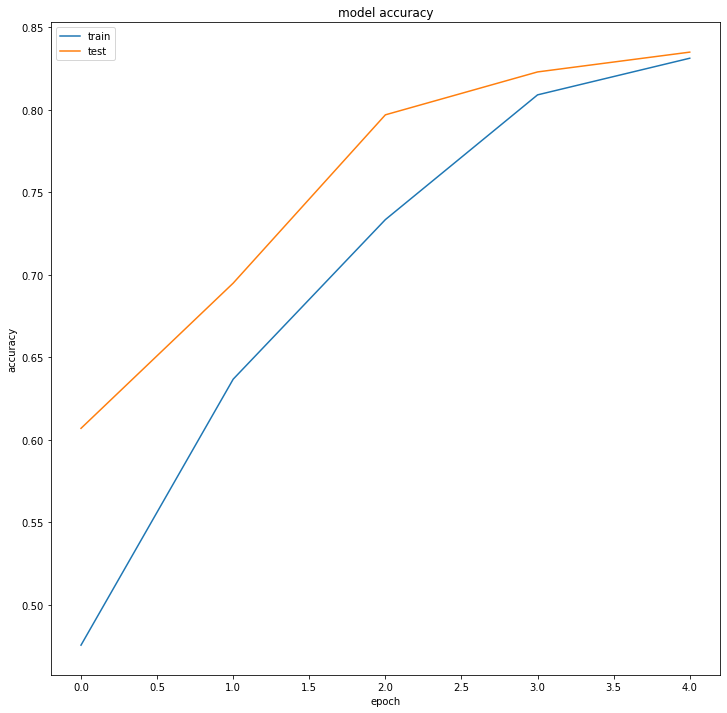

In [63]:
"""
import keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping( monitor='val_loss', patience=100)

history = model.fit([inputs_train,questions_train],answers_train, 
                    batch_size = 32, epochs = 150, 
                    validation_data = ([inputs_test,questions_test],answers_test),
                    callbacks=[early_stopping_callback]  )
"""
# 위의 코드는 학습데이터 정확도는 up, 테스트 데이터 정확도가 정체된 오버휫팅때 스탑시킴
######################################################################################



history = model.fit([inputs_train,questions_train],answers_train, 
                    batch_size = 32, epochs = 5, 
                    validation_data = ([inputs_test,questions_test],answers_test) )

val=model.evaluate( [inputs_train,questions_train], answers_train, 
                    batch_size = 32)


print(val)


######################################


filename = './data_out/babi_chatbot.h5'

model.save(filename)


# 길이가 38인 곳으로 랜덤하게 가기에, 확률적으로 1/38


########################################

# model.fit 안하면 history 없어서 ==> 에러 
# NameError: name 'history' is not defined


#Lets plot the increase of accuracy as we increase the number of training epochs
#We can see that without any training the acc is about 50%, random guessing

import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())
# summarize history for accuracy

plt.figure(figsize=(12,12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# batch_size = 32 와 epochs=50 의 시작

Train on 10000 samples, validate on 1000 samples

Epoch 1/50
    10000/10000 [==============================] - 7s 686us/step - loss: 0.8794 - accuracy: 0.5036 - val_loss: 0.6941 - val_accuracy: 0.5030

Epoch 2/50
    10000/10000 [==============================] - 6s 570us/step - loss: 0.7019 - accuracy: 0.4998 - val_loss: 0.6937 - val_accuracy: 0.4970



# batch_size = 64 와 epochs=50 의 끝

Epoch 48/50
    10000/10000 [==============================] - 5s 530us/step - loss: 0.3619 - accuracy: 0.8410 - val_loss: 0.4453 - val_accuracy: 0.7980

Epoch 49/50
    10000/10000 [==============================] - 5s 542us/step - loss: 0.3586 - accuracy: 0.8406 - val_loss: 0.4490 - val_accuracy: 0.7950

Epoch 50/50
    10000/10000 [==============================] - 5s 547us/step - loss: 0.3553 - accuracy: 0.8424 - val_loss: 0.4508 - val_accuracy: 0.8030



=
=
=
=

# batch_size = 32 에 epochs=50 결과


![title](images/babi_train_start.png)

# batch_size = 32 에 epochs=100 결과

![title](images/babi_train.png)




## [문제] 학습데이터의 정확도는 높아지는데, 테스트 데이터는 정지됨 !!

### 과적합 over-fitting의 개념을 이해하고, 테스트 데이터 정확도를 높이는 방법을 탐구 !

<p>
    
### 1. 일만개의 학습데이터와 천개의 테스크 데이터로 나뉘어 있다. 데이터를 일만천개로 바꾸어, 
### 돌아가며 k-fold cross validation 하는 방법을 알아보라 (데이터의 양이 적은 경우에 필요)
    
<p>
    
### 2. Keras 모델의 한계일 수 있다. Hidden layer 갯수나 딥러닝 알고리즘을 바꾸어 학습을 시킨다, 
### 인터넷 등에서 새로운 여러가지 딥러닝 알고리즘을 알아보고, 이를 Babi 에 적용한다.
    

## 현재의 딥러닝 모델 
<pre>
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
__________________________________________________________________________________________________
dot_1 (Dot)                     (None, 156, 6)       0           sequential_1[1][0]               
                                                                 sequential_3[1][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 156, 6)       0           dot_1[0][0]                      
__________________________________________________________________________________________________
sequential_2 (Sequential)       multiple             228         input_1[0][0]                    
__________________________________________________________________________________________________
add_1 (Add)                     (None, 156, 6)       0           activation_1[0][0]               
                                                                 sequential_2[1][0]               
__________________________________________________________________________________________________
permute_1 (Permute)             (None, 6, 156)       0           add_1[0][0]                      
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 6, 220)       0           permute_1[0][0]                  
                                                                 sequential_3[1][0]               
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           32384       concatenate_1[0][0]              
__________________________________________________________________________________________________
dropout_4 (Dropout)             (None, 32)           0           lstm_1[0][0]                     
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 38)           1254        dropout_4[0][0]                  
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 38)           0           dense_1[0][0]                    
==================================================================================================
Total params: 38,730
Trainable params: 38,730
Non-trainable params: 0
__________________________________________________________________________________________________
</pre>




## ==========================================

# 학습된 AI 두뇌 모델 evaluate   !!!! 


# ===================================

In [65]:
# model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# print( answers_train.shape  ) ==> ( 10000, 38 ) one hot vector

### train 에 대해서 evaluate 한다 //////// test 데이터로 하는 것과 차이 ?? ///////

val=model.evaluate( [inputs_train,questions_train], answers_train, batch_size = 32)

###################################################################################


val  

# 50 때 0.88

10000/10000 [==============================] - 1s 94us/step


[0.34663112587928774, 0.8614000082015991]

## ==========================================

# 학습된 AI 두뇌 테스트를 위해 문제를 출제 !!!! 


# ====================================

In [66]:
#Lets check out the predictions on the test set:
#These are just probabilities for every single word on the vocab
# 테스트 데이터 기반의 prediction ##############################


pred_results = model.predict(([inputs_test,questions_test]))

print( pred_results )

[[5.3464513e-09 4.7893756e-09 5.9277316e-09 ... 5.8098868e-09
  6.7517063e-09 5.7777618e-09]
 [1.1304347e-08 9.6045669e-09 1.1915859e-08 ... 1.1772948e-08
  1.3240343e-08 1.3179218e-08]
 [4.7399933e-08 3.1272307e-08 4.0516948e-08 ... 4.2989544e-08
  4.5466496e-08 4.3368548e-08]
 ...
 [2.2156049e-08 1.7657909e-08 2.2862498e-08 ... 2.3986395e-08
  2.4334682e-08 2.7791978e-08]
 [5.1913876e-08 3.6524860e-08 4.4735319e-08 ... 4.9788913e-08
  5.2742969e-08 4.8548156e-08]
 [5.2890915e-08 3.6501500e-08 5.2736290e-08 ... 5.5532698e-08
  5.7155237e-08 6.0597074e-08]]


These results are an array, as mentioned earlier that contain in every position the probabilities of each of the words in the vocabulary being the answer to the question. If we look at the first element of this array, we will see a vector of the size of the vocabulary, where all the times are close to 0 except the ones corresponding to yes or no.

Out of these, if we pick the index of the highest value of the array and then see to which word it corresponds to, we should find out if the answer is affirmative or negative.

One fun thing that we can do now, is create our own stories and questions, and feed them to the bot to see what he says!

In [67]:
my_story = 'Sandra picked up the milk . Mary travelled left . '
my_question = 'Sandra got the milk ?'

my_data = [(my_story.split(), my_question.split(),'yes')]
my_story, my_ques, my_ans = vectorize_stories(my_data)

pred_results = model.predict(([my_story,my_ques]))
val_max = np.argmax(pred_results[0])

print(pred_results[0][val_max])
      
# 맟출 확률이 1/38
# 50 에서는 0.579
# 100 dptj 0.69
# 150 에서 0.54

0.9167208


In [68]:
#These are the probabilities for the vocab words using the 1st sentence


pred_results[0]

array([2.1539566e-09, 2.0857203e-09, 2.1775060e-09, 1.6845408e-09,
       8.3016913e-14, 2.4515723e-09, 1.7732332e-09, 1.8030241e-09,
       2.0983812e-09, 2.5064566e-09, 1.7346922e-09, 2.6375377e-09,
       2.6769633e-09, 1.9282695e-09, 2.0566882e-09, 2.1949988e-09,
       2.7570446e-09, 2.2814801e-09, 2.1163804e-09, 1.9202608e-09,
       1.7847666e-09, 3.2790710e-09, 1.9234943e-09, 1.9196751e-09,
       1.8828541e-09, 1.9834059e-09, 1.6332830e-09, 2.6791394e-09,
       3.1429914e-09, 8.3279103e-02, 2.2346143e-09, 9.1672081e-01,
       1.8621893e-09, 1.9928785e-09, 9.0607491e-13, 2.0374977e-09,
       2.4011575e-09, 2.4124640e-09], dtype=float32)

In [69]:
val_max = np.argmax(pred_results[0])

In [70]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [71]:
#See probability:

pred_results[0][val_max]

0.9167208

# ================================

In [72]:
#Now, we can make our own questions using the vocabulary we have

print( len(vocab)   )
vocab

# 'office': 1
# '?': 37  == 마지막 index

37


{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [74]:
my_story = 'Sandra picked up the milk . Mary travelled left . '

In [75]:
my_story.split()

['Sandra',
 'picked',
 'up',
 'the',
 'milk',
 '.',
 'Mary',
 'travelled',
 'left',
 '.']

    my_story = 'Sandra picked up the milk . Mary travelled left . '
    my_question = 'Sandra got the milk ?'
    my_data = [(my_story.split(), my_question.split(),'yes')]
    my_story, my_ques, my_ans = vectorize_stories(my_data)
    pred_results = model.predict(([my_story,my_ques]))
    val_max = np.argmax(pred_results[0])
    print(pred_results[0][val_max])

In [76]:
my_question = 'Sandra got the milk ?'

In [77]:
my_question.split()

['Sandra', 'got', 'the', 'milk', '?']

In [78]:
#Put the data in the same format as before
my_data = [(my_story.split(), my_question.split(),'yes')]

In [79]:
#Vectorize this data
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [80]:
#Make the prediction

pred_results = model.predict(([my_story,my_ques]))

print( pred_results.shape  )
print( 'yes : ', pred_results[0][26] )
print( 'no : ', pred_results[0][37] )
print( pred_results[0][26]/ pred_results[0][37] )

# 50 일때 yes / no = 0.986 거의 같은 확률 0

(1, 38)
yes :  1.633283e-09
no :  2.412464e-09
0.6770186


     'yes': 24,
 'left': 25,
 'to': 26,
 'milk': 27,
 'in': 28,
 'moved': 29,
 'discarded': 30,
 
     'no': 31,

In [81]:
val_max = np.argmax(pred_results[0])
print( val_max )


31


In [82]:
#Correct prediction!

for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print(val)
print(k)

37
no


In [83]:
#Confidence
pred_results[0][val_max]

0.9167208

# ====================================


In [85]:
my_story = 'Sandra picked up the milk . Sandra moved to the bathroom . '
my_question = 'Is the milk in the bathroom ?'
my_data = [(my_story.split(), my_question.split(),'yes')]
my_story, my_ques, my_ans = vectorize_stories(my_data)
pred_results = model.predict(([my_story,my_ques]))
val_max = np.argmax(pred_results[0])

print(pred_results[0][val_max])
###############################
# 50 에서는 0.9748
# 100 에서는 0.974858
# 150 에서 0.6165

model.evaluate([inputs_train,questions_train],answers_train, 
                    batch_size = 32)


0.8649988
10000/10000 [==============================] - 1s 90us/step


[0.34663112587928774, 0.8614000082015991]

In [86]:
val_max = np.argmax(pred_results[0])
print( val_max )

#Correct prediction!

for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print(val)
print(k)

29
37
yes


# ====================================

<p> &nbsp;

    
한 장에 모아쓴 코드

In [2]:
import keras
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Permute, dot, add, concatenate
from keras.layers import LSTM, Dense, Dropout, Input, Activation
from keras.utils.data_utils import get_file
from keras.preprocessing.sequence import pad_sequences

from functools import reduce
import tarfile
import numpy as np
import re

import IPython
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

def tokenize(sent):
    return [ x.strip() for x in re.split('(\W+)+', sent) if x.strip()]

def parse_stories(lines):
    '''Parse stories provided in the bAbi tasks format
    '''
    data = []
    story = []
    for line in lines:
        line = line.decode('utf-8').strip()
        nid, line = line.split(' ', 1)
        nid = int(nid)
        if nid == 1:
            story = []
        if '\t' in line:
            q, a, supporting = line.split('\t')
            q = tokenize(q)
            # Provide all the substories
            substory = [x for x in story if x]
            data.append((substory, q, a))
            story.append('')
        else:
            sent = tokenize(line)
            story.append(sent)
    return data


def get_stories(f):
    data = parse_stories(f.readlines())
    flatten = lambda data: reduce(lambda x, y: x + y, data)
    data = [(flatten(story), q, answer) for story, q, answer in data]
    return data

def vectorize_stories(data, word_idx, story_maxlen, query_maxlen):
    X = []
    Xq = []
    Y = []
    for story, query, answer in data:
        x = [word_idx[w] for w in story]
        xq = [word_idx[w] for w in query]
        # let's not forget that index 0 is reserved
        y = np.zeros(len(word_idx) + 1)
        y[word_idx[answer]] = 1
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=story_maxlen),
            pad_sequences(Xq, maxlen=query_maxlen), np.array(Y))


class TrainingVisualizer(keras.callbacks.History):
    def on_epoch_end(self, epoch, logs={}):
        super().on_epoch_end(epoch, logs)
        IPython.display.clear_output(wait=True)
        pd.DataFrame({key: value for key, value in self.history.items() if key.endswith('loss')}).plot()
        axes = pd.DataFrame({key: value for key, value in self.history.items() if key.endswith('acc')}).plot()
        axes.set_ylim([0, 1])
        plt.show() 


In [ ]:
try:
    path = get_file('babi-tasks-v1-2.tar.gz', origin='https://s3.amazonaws.com/text-datasets/babi_tasks_1-20_v1-2.tar.gz')
except:
    print('Error downloading dataset, please download it manually:\n'
          '$ wget http://www.thespermwhale.com/jaseweston/babi/tasks_1-20_v1-2.tar.gz\n'
          '$ mv tasks_1-20_v1-2.tar.gz ~/.keras/datasets/babi-tasks-v1-2.tar.gz')
    raise
tar = tarfile.open(path)


challenge = 'tasks_1-20_v1-2/en-10k/qa1_single-supporting-fact_{}.txt'

print('Extracting stories for the challenge: single_supporting_fact_10k')
train_stories = get_stories(tar.extractfile(challenge.format('train')))
test_stories = get_stories(tar.extractfile(challenge.format('test')))

print( len(train_stories), len(test_stories) )
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
print( train_stories[0] )

vocab = set()
for story, q, answer in train_stories + test_stories:
    vocab |= set(story + q + [answer])
vocab = sorted(vocab)

# Reserve 0 for masking via pad_sequences
vocab_size = len(vocab) + 1
story_maxlen = max(map(len, (x for x, _, _ in train_stories + test_stories)))
query_maxlen = max(map(len, (x for _, x, _ in train_stories + test_stories)))


word_idx = dict((c, i + 1) for i, c in enumerate(vocab))
idx_word = dict((i+1, c) for i,c in enumerate(vocab))
inputs_train, queries_train, answers_train = vectorize_stories(train_stories,
                                                               word_idx,
                                                               story_maxlen,
                                                               query_maxlen)
inputs_test, queries_test, answers_test = vectorize_stories(test_stories,
                                                            word_idx,
                                                            story_maxlen,
                                                            
                                                            
print('-------------------------')
print('Vocabulary:\n',vocab,"\n")
print('Vocab size:', vocab_size, 'unique words')
print('Story max length:', story_maxlen, 'words')
print('Query max length:', query_maxlen, 'words')
print('Number of training stories:', len(train_stories))
print('Number of test stories:', len(test_stories))
print('-------------------------')
                                                            
print('-------------------------')
print('inputs: integer tensor of shape (samples, max_length)')
print('inputs_train shape:', inputs_train.shape)
print('inputs_test shape:', inputs_test.shape)
print('input train sample', inputs_train[0,:])
print('-------------------------')
                                                            
print('-------------------------') 
print('queries: integer tensor of shape (samples, max_length)') 
print('queries_train shape:', queries_train.shape) 
print('queries_test shape:', queries_test.shape) 
print('query train sample', queries_train[0,:]) 

                                                            
print('-------------------------') 
print('answers: binary (1 or 0) tensor of shape (samples, vocab_size)') 
print('answers_train shape:', answers_train.shape) 
print('answers_test shape:', answers_test.shape) 
print('answer train sample', answers_train[0,:]) 
print('-------------------------')
                                                            
                                                            
                                                            
                                                            

In [ ]:
train_epochs = 100
batch_size = 32
lstm_size = 64
embed_size = 50
dropout_rate = 0.3


# placeholders
input_sequence = Input((story_maxlen,))
question = Input((query_maxlen,))

print('Input sequence:', input_sequence)
print('Question:', question)

# encoders
# embed the input sequence into a sequence of vectors
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=embed_size))
input_encoder_m.add(Dropout(dropout_rate))
# output: (samples, story_maxlen, embedding_dim)

# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=query_maxlen))
input_encoder_c.add(Dropout(dropout_rate))
# output: (samples, story_maxlen, query_maxlen)

# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=embed_size,
                               input_length=query_maxlen))
question_encoder.add(Dropout(dropout_rate))
# output: (samples, query_maxlen, embedding_dim)

# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
print('Input encoded m', input_encoded_m)
input_encoded_c = input_encoder_c(input_sequence)
print('Input encoded c', input_encoded_c)
question_encoded = question_encoder(question)
print('Question encoded', question_encoded)


# compute a 'match' between the first input vector sequence
# and the question vector sequence
# shape: `(samples, story_maxlen, query_maxlen)
match = dot([input_encoded_m, question_encoded], axes=-1, normalize=False)
print(match.shape)
match = Activation('softmax')(match)
print('Match shape', match.shape)

# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)
print('Response shape', response)

# concatenate the response vector with the question vector sequence
answer = concatenate([response, question_encoded])
print('Answer shape', answer)

answer = LSTM(lstm_size)(answer)  # Generate tensors of shape 32
answer = Dropout(dropout_rate)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit([inputs_train, queries_train], answers_train, batch_size, train_epochs, callbacks=[TrainingVisualizer()],
          validation_data=([inputs_test, queries_test], answers_test))

model.save('model.h5')


for i in range(0,10):
        current_inp = test_stories[i]
        current_story, current_query, current_answer = vectorize_stories([current_inp], word_idx, story_maxlen, query_maxlen)
        current_prediction = model.predict([current_story, current_query])
        current_prediction = idx_word[np.argmax(current_prediction)]
        print(' '.join(current_inp[0]), ' '.join(current_inp[1]), '| Prediction:', current_prediction, '| Ground Truth:', current_inp[2])
        print("-----------------------------------------------------------------------------------------")
        

In [ ]:
# print('-------------------------------------------------------------------------------------------')
# print('Custom User Queries (Make sure there are spaces before each word)')
# while 1:
#     print('-------------------------------------------------------------------------------------------')
#     print('Please input a story')
#     user_story_inp = input().split(' ')
#     print('Please input a query')
#     user_query_inp = input().split(' ')
#     user_story, user_query, user_ans = vectorize_stories([[user_story_inp, user_query_inp, '.']], word_idx, story_maxlen, query_maxlen)
#     user_prediction = model.predict([user_story, user_query])
#     user_prediction = idx_word[np.argmax(user_prediction)]
#     print('Result')
#     print(' '.join(user_story_inp), ' '.join(user_query_inp), '| Prediction:', user_prediction)

# Mary went to the bathroom . John moved to the hallway . Mary travelled to the office . # Where is Mary ?
# Sandra travelled to the office . John journeyed to the garden .

# ====================================

<p> &nbsp;

# [생각] 영어 데이터를 한글 번역기로 번역을 시킨다.

<p> &nbsp;
    
# [생각] 한글용 Babi 데이터로 한글 QA 만들어본다.

<p> &nbsp;
    
# [생각] 수학학습 질문과 답변 데이터로 만들어본다.

<p> &nbsp;

# web 버젼, attention 버젼


# https://github.com/vinhkhuc/MemN2N-babi-python

# ++++++++++++++++++++++++++++++++++

<p> &nbsp;

# sequence 2 sequence  실험 

<p> &nbsp;

![title](images/seq2seq.png)

In [4]:
import tensorflow.compat.v1  as tf
tf.disable_eager_execution()

import numpy as np

char_arr = [c for c in "SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀키스사랑봉구우루"]
num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)

seq_data = [['word', "단어"], ["wood", "나무"], ["game", "놀이"], ["girl", "소녀"], 
            ["kiss", "키스"], ["love", "사랑"], ["bong", "봉구"], ["uruu", "우루"]]

In [5]:
def make_batch(seq_data):
    input_batch = []
    output_batch = []
    target_batch = []
    
    for seq in seq_data:
        input = [num_dic[n] for n in seq[0]]
        output = [num_dic[n] for n in ("S" + seq[1])]
        target = [num_dic[n] for n in (seq[1] + "E")]
        
        input_batch.append(np.eye(dic_len)[input])
        output_batch.append(np.eye(dic_len)[output])
        target_batch.append(target)
        
    return input_batch, output_batch, target_batch

In [6]:
learning_rate = 0.001
n_hidden = 128
total_epoch = 1000

n_class = n_input = dic_len

enc_input = tf.placeholder(tf.float32, [None, None, n_input])
dec_input = tf.placeholder(tf.float32, [None, None, n_input])
targets = tf.placeholder(tf.int64, [None, None])


# encoder: [batch size, time steps, input size]
# decoder: [batch size, time steps]

with tf.variable_scope("encode"):
    enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)
    
    outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input, dtype=tf.float32)
    
with tf.variable_scope("decode"):
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)
    
    outputs, dec_stats = tf.nn.dynamic_rnn(dec_cell, dec_input, 
                                           initial_state=enc_states, dtype=tf.float32)


Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model = tf.layers.dense(outputs, n_class, activation=None)
cost = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=model, labels=targets
    )
)
opt = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [8]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

input_batch, output_batch, target_batch = make_batch(seq_data)

cost_val = []
for epoch in range(total_epoch):
    _, loss = sess.run([opt, cost], feed_dict={enc_input: input_batch,
                                               dec_input: output_batch,
                                               targets: target_batch})
    cost_val.append(loss)
    
    if (epoch+1) % 200 ==0:
        print("Epoch: {:04d}, cost: {}".format(epoch+1, loss))
    
    
print("\noptimization complete")

Epoch: 0200, cost: 0.07781609892845154
Epoch: 0400, cost: 0.025294050574302673
Epoch: 0600, cost: 0.008742648176848888
Epoch: 0800, cost: 0.004197845701128244
Epoch: 1000, cost: 0.008464171551167965

optimization complete


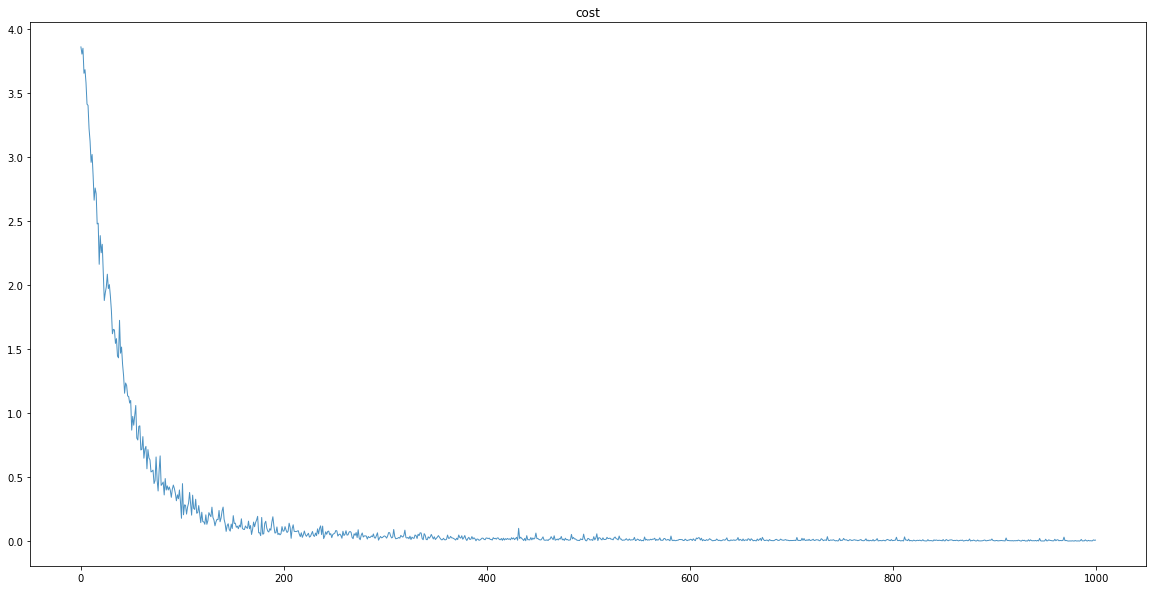

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(20, 10))
plt.title("cost")
plt.plot(cost_val, linewidth=1, alpha=0.8)
plt.show()

In [11]:
def translate(word):
    seq_data = [word, "P" * len(word)]
    
    input_batch, output_batch, target_batch = make_batch([seq_data])
    prediction = tf.argmax(model, 2)
    
    result = sess.run(prediction, feed_dict={enc_input: input_batch,
                                             dec_input: output_batch,
                                             targets: target_batch})
    decoded = [char_arr[i] for i in result[0]]
    
    try:
        end = decoded.index("E")
        translated = "".join(decoded[:end])
        return translated
        
    except Exception as ex:
        pass
    
    
    
    
    
print("\n ==== translate test ====")

print("word -> {}".format(translate("word")))
print("wodr -> {}".format(translate("wodr")))
print("love -> {}".format(translate("love")))
print("loev -> {}".format(translate("loev")))
print("bogn -> {}".format(translate("bogn")))
print("uruu -> {}".format(translate("uruu")))
print("abcd -> {}".format(translate("abcd")))


 ==== translate test ====
word -> 단어
wodr -> 단무
love -> 사랑
loev -> 사랑
bogn -> 봉구
uruu -> 우루
abcd -> 놀봉구


#  자동 단어 완성 !! (3글자 ==> 4글자)

![title](images/word_auto.png)

In [12]:
import tensorflow.compat.v1  as tf
import numpy as np

char_arr = ["a", "b", "c", "d", "e", "f", "g",
            "h", "i", "j", "k", "l", "m", "n",
            "o", "p", "q", "r", "s", "t", "u",
            "v", "w", "x", "y", "z"]

num_dic = {n: i for i, n in enumerate(char_arr)}
dic_len = len(num_dic)


seq_data = ["word", "wood", "deep", "dive", "cold", "cool", "load", "love", "kiss", "kind"]

In [13]:
def make_batch(seq_data):
    input_batch = []
    target_batch = []
    
    for seq in seq_data:
        input = [num_dic[n] for n in seq[:-1]]
        target = num_dic[seq[-1]]
        input_batch.append(np.eye(dic_len)[input])
        target_batch.append(target)
        
    return input_batch, target_batch

In [14]:
learning_rate = 0.001
n_hidden = 128
total_epoch = 10000

n_step = 3
n_input = n_class = dic_len



X = tf.placeholder(tf.float32, [None, n_step, n_input], name="input_X")
Y = tf.placeholder(tf.int32, [None])

W = tf.Variable(tf.random_normal([n_hidden, n_class]))
b = tf.Variable(tf.random_normal([n_class]))




In [15]:
cell1 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
cell1 = tf.nn.rnn_cell.DropoutWrapper(cell1, output_keep_prob=0.5)
cell2 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)

# MultiRNNCell 함수를 사용하여 조합
multi_cell = tf.nn.rnn_cell.MultiRNNCell([cell1, cell2])
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)


outputs = tf.transpose(outputs, [1, 0, 2])
outputs = outputs[-1]
model = tf.matmul(outputs, W) + b

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


In [16]:
cost = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels=Y)   
)
opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)



In [17]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

input_batch, output_batch = make_batch(seq_data)

cost_epoch = []
for epoch in range(total_epoch):
    _, loss = sess.run([opt, cost], feed_dict={X: input_batch, Y: output_batch})
    cost_epoch.append(loss)
    
    if (epoch+1) % 2000 ==0:
        print("Epoch: {}, cost= {}".format(epoch+1, loss))
        
print("\noptimization complete")

Epoch: 2000, cost= 4.428016836754978e-05
Epoch: 4000, cost= 1.1086447102570673e-06
Epoch: 6000, cost= 0.00020040673553012311
Epoch: 8000, cost= 1.192092824453539e-08
Epoch: 10000, cost= 3.576278473360617e-08

optimization complete


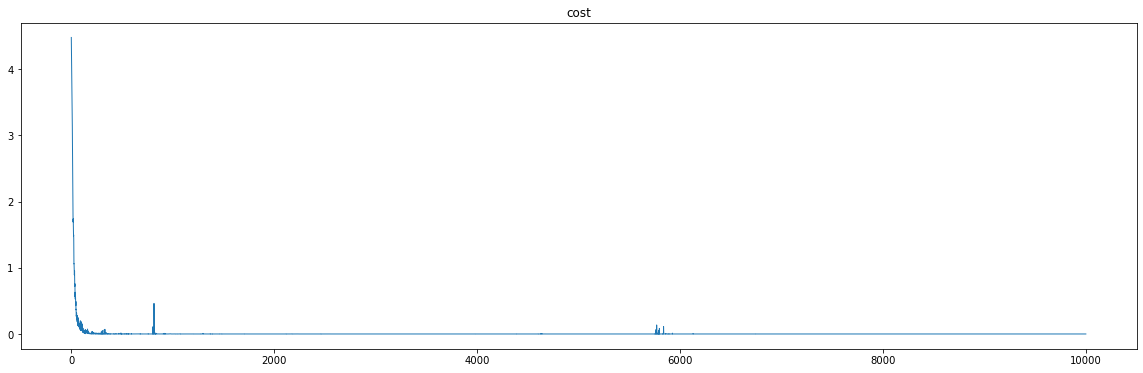

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams["axes.unicode_minus"] = False
plt.figure(figsize=(20,6))
plt.title("cost")
plt.plot(cost_epoch, linewidth=1)
plt.show()

In [19]:
prediction = tf.cast(tf.argmax(model, 1), tf.int32)
prediction_check = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(prediction_check, tf.float32))


input_batch, target_batch = make_batch(seq_data)

predict, accuracy_val = sess.run([prediction, accuracy], 
                                 feed_dict={X: input_batch, Y: target_batch})



predict_word = []
for idx, val in enumerate(seq_data):
    last_char = char_arr[predict[idx]]
    predict_word.append(val[:3] + last_char)
    
print("\n==== prediction ====")
print("input_value: \t\t{}".format([w[:3] for w in seq_data]))
print("prediction_value: \t{}".format(predict_word))
print("accuracy: {:.3f}".format(accuracy_val))







==== prediction ====
input_value: 		['wor', 'woo', 'dee', 'div', 'col', 'coo', 'loa', 'lov', 'kis', 'kin']
prediction_value: 	['word', 'wood', 'deep', 'dive', 'cold', 'cool', 'load', 'love', 'kiss', 'kind']
accuracy: 1.000


# 4.ipynb 에서 attention 개념 위해 사용하는 toy 코드

<p> &nbsp;
    
# +++++++++++++++++++++++++++++++++++++++++++++++++++
    
<p> &nbsp;
    
### [과제] 실행시간이 오래 걸림 . 저장된 모델 불러오는 기능을 추가.  
    
### [과제] 구글 번역기로 한글 charbot 데이터를 영어로 번역하고 탐구.

In [3]:
from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np

batch_size = 64  # Batch size for training.
epochs = 3 # 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'data_nmt/data/kor.txt'

# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text, rest = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.
    decoder_input_data[i, t + 1:, target_token_index[' ']] = 1.
    decoder_target_data[i, t:, target_token_index[' ']] = 1.
# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Run training
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
# Save model
model.save('./data_nmt/data/s2s.h5')

# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence


for seq_index in range(100):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)

Number of samples: 3318
Number of unique input tokens: 75
Number of unique output tokens: 891
Max sequence length for inputs: 537
Max sequence length for outputs: 298
Train on 2654 samples, validate on 664 samples
Epoch 1/100
2654/2654 [==============================] - 473s 178ms/step - loss: 0.6580 - accuracy: 0.9389 - val_loss: 0.4219 - val_accuracy: 0.9375
Epoch 2/100
2654/2654 [==============================] - 570s 215ms/step - loss: 0.2244 - accuracy: 0.9626 - val_loss: 0.4568 - val_accuracy: 0.9375
Epoch 3/100
 192/2654 [=>............................] - ETA: 9:17 - loss: 0.2123 - accuracy: 0.9642

KeyboardInterrupt: 